## Importing necessary libraries and data

In [269]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Overview

- Observations
- Sanity checks

In [270]:
df = pd.read_csv("used_phone_data.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')  # using f-string for string formatting
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)
np.random.seed(1) #use of random seed will give same results every time
df.sample(n=10) #looking at 10 random rows

There are 3571 rows and 15 columns


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.680,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.150,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.470,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.880,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.810,8.92
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.540,96.18
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.150,350.08
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.300,75.94
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.500,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,159.885,80.00


### Observations
By looking at the random 10 rows in the dataset we can see 15 columns and overall dataset has 3571 rows. There are also few missing values in the data set. 

In [271]:
df.columns #taking look at the columns in the dataset

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


### Observations
* The columns having missing values are - main_camera_mp,selfie_camera_mp, int_memory, ram, battery, weight  
* dtypes: float64(9), int64(2), object(4)

In [273]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

### Observations
* There are few missing values in the columns - main_camera_mp, int_memory, ram , weight, battery , selfie_camera_mp 
* main_camera_mp columns has more number of missing values

In [274]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


### Observations
* The min value of ram is 0.03 to max value - 16.0
* The min values of used_price is 2.51 euros to max of 1916.54 euros
* The count of the columns are different stating missing values
* The top os preferred by customers is Android

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

#### 1. What does the distribution of used phone prices look like?

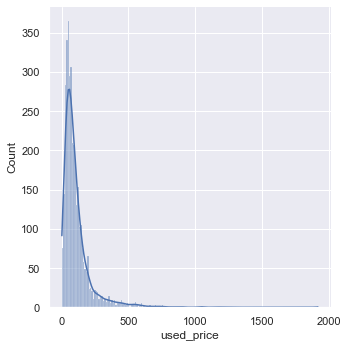

In [275]:
sns.displot(data=df, x='used_price', kde=True) 

### Observations
* The distribution of used phone prices is right skewed.

#### 2. What percentage of the used phone market is dominated by Android devices?

In [276]:
df_used_phone_market = df[df['os'] =='Android']
df_used_phone_market

# Calculating percentage of used phone market, dominated by Android devices in the dataset
percentage = (df_used_phone_market.shape[0] / df.shape[0]) * 100
print("Percentage of the used phone market is dominated by Android devices:", round(percentage, 2), '%')

Percentage of the used phone market is dominated by Android devices: 90.9 %


### Observations
* Percentage of the used phone market is dominated by Android devices: 90.9 %

#### 3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

In [277]:
df.groupby('brand_name')['ram'].value_counts()

brand_name  ram  
Acer        4.00      49
            1.00       1
            2.00       1
Alcatel     4.00     102
            1.00      10
            0.25       7
            0.50       3
            2.00       2
            3.00       1
Apple       4.00      54
            3.00       2
            6.00       2
            2.00       1
Asus        4.00     121
            2.00       2
            8.00       2
            6.00       1
BlackBerry  4.00      21
            0.25       1
Celkon      0.25      25
            4.00      12
Coolpad     4.00      21
            3.00       1
Gionee      4.00      55
            0.25       1
Google      4.00      11
            6.00       4
HTC         4.00     104
            3.00       4
            6.00       2
Honor       4.00      72
            8.00      16
            6.00      14
            3.00      10
            2.00       6
Huawei      4.00     185
            6.00      34
            8.00      26
            0.25       5
       

### Observations
* The following brands have minimum configuration of 0.03GB - Huawei,others
* The following brands have maximum configuration of 16GB - Huawei,Nokia
* Huawei has wide range of RAM configuration
* All the phones atleast has 4GB amount of RAM 

#### 4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

In [278]:
df[df['battery'] > 4500]['weight'].shape

(346,)

In [279]:
df[df['battery'] >4500]['weight'].min()

23.0

In [280]:
df[df['battery'] >4500]['weight'].max()

950.0

In [281]:
print('The weight vary for phones offering large batteries (more than 4500 mAh)', 
      (df[df['battery'] >4500]['weight'].value_counts()),'grams')


The weight vary for phones offering large batteries (more than 4500 mAh) 195.0    11
185.0     9
199.0     9
310.0     7
460.0     7
208.0     7
469.0     6
498.0     6
210.0     6
305.0     5
188.0     5
197.0     5
218.0     5
190.0     5
209.0     5
510.0     5
450.0     5
198.0     4
490.0     4
215.0     4
173.0     4
360.0     4
181.0     3
175.0     3
180.0     3
525.0     3
487.0     3
200.0     3
331.0     3
193.0     3
190.5     3
239.0     3
290.0     3
338.0     3
340.0     3
495.0     3
320.0     3
189.0     3
203.0     3
335.0     2
509.0     2
168.0     2
390.0     2
620.0     2
202.0     2
350.0     2
550.0     2
753.0     2
500.0     2
465.0     2
211.0     2
475.0     2
437.0     2
480.0     2
468.0     2
655.0     2
222.0     2
420.0     2
204.1     2
201.0     2
220.0     2
205.0     2
299.0     2
147.5     2
213.0     2
467.0     2
580.0     2
439.0     2
520.0     2
453.6     2
118.0     1
339.9     1
358.0     1
400.0     1
186.0     1
174.0     1
660.0     1
192

### Observations
* 11 phones in total with battery more than 4500 mAh has weight of 195 grams compared to other phones.
* Out of 3571 phones only 346 phones has battery which is more than 4500 mAh
* The weight for phones offering large batteries (more than 4500 mAh) ranges from 23.0(min) to 950.0(max)

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?

In [282]:
df1=df.copy()
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [284]:
df1['screen_size_in_inches']=df1['screen_size'] / 2.54 #screen size is in cms converting it to inches and creating new column with it
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,screen_size_in_inches
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96,9.437008
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49,11.062992
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55,9.562992
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23,10.251969
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80,6.188976


In [214]:
big_screen =df1[df1['screen_size_in_inches']>6]['brand_name'].value_counts()
big_screen

Huawei        159
Samsung       128
Others        116
Honor          87
Vivo           86
Xiaomi         85
Lenovo         72
Oppo           70
LG             68
Asus           44
Motorola       44
Realme         40
Nokia          28
Alcatel        28
Meizu          25
Apple          24
ZTE            22
Acer           19
OnePlus        16
Sony           14
Micromax       11
Infinix        10
HTC             8
Gionee          7
Google          4
XOLO            4
Coolpad         3
Celkon          2
BlackBerry      2
Karbonn         2
Panasonic       2
Lava            2
Spice           2
Microsoft       1
Name: brand_name, dtype: int64

In [215]:
big_screen.sum()

1235

### Observations
* The top 10 phones with a screen size larger than 6 inches - Huawei, Samsung, Others, Honor, Vivo, Xiaomi, Lenovo, Oppo, LG, Asus  
* Maximum number of phones with a screen size larger than 6 inches is Huawei 
* There is total of 1235 phones available with a screen size larger than 6 inches.

#### 6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

In [216]:
df1['budget_phones'] =df1[df1['selfie_camera_mp']>8.0]['brand_name'] #creating new column with 8MP selfie camera
df1['budget_phones'].value_counts()

Huawei        91
Vivo          78
Oppo          75
Xiaomi        65
Samsung       60
Honor         43
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
Realme        18
OnePlus       18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: budget_phones, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'HTC'),
  Text(2, 0, 'Huawei'),
  Text(3, 0, 'Infinix'),
  Text(4, 0, 'Lenovo'),
  Text(5, 0, 'LG'),
  Text(6, 0, 'Meizu'),
  Text(7, 0, 'Motorola'),
  Text(8, 0, 'Nokia'),
  Text(9, 0, 'OnePlus'),
  Text(10, 0, 'Oppo'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'Realme'),
  Text(13, 0, 'Vivo'),
  Text(14, 0, 'Xiaomi'),
  Text(15, 0, 'ZTE'),
  Text(16, 0, 'Samsung'),
  Text(17, 0, 'Coolpad'),
  Text(18, 0, 'Acer'),
  Text(19, 0, 'Asus'),
  Text(20, 0, 'BlackBerry'),
  Text(21, 0, 'Gionee'),
  Text(22, 0, 'Micromax'),
  Text(23, 0, 'Panasonic'),
  Text(24, 0, 'Sony')])

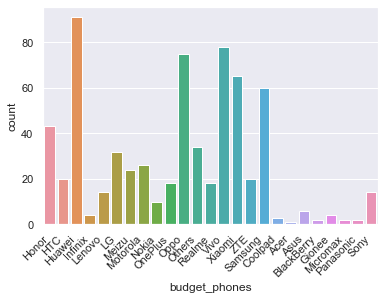

In [217]:
sns.countplot(x = 'budget_phones', data = df1)
plt.xticks(rotation = 45, ha = 'right')

### Observations
* There are totally 666 phones offering greater than 8MP selfie cameras across brands
* Huawei, Samsung, Oppo , Vivo, Xiaomi are the top 5 phones with greater than 8MP selfie camera across brands

#### 7. Which attributes are highly correlated with the used phone price?

<AxesSubplot:>

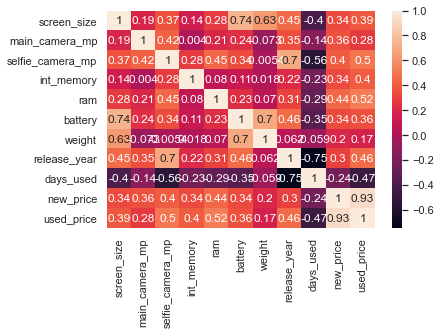

In [218]:
sns.heatmap(df.corr(),annot=True) 

In [219]:
df.corr() 

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
screen_size,1.000000,0.189274,0.370251,0.143750,0.283320,0.741848,0.634869,0.454596,-0.397210,0.342092,0.385928
main_camera_mp,0.189274,1.000000,0.423704,0.004032,0.206895,0.239659,-0.073371,0.354243,-0.142915,0.360324,0.281065
selfie_camera_mp,0.370251,0.423704,1.000000,0.283188,0.445200,0.344864,-0.005384,0.696703,-0.556027,0.399368,0.497530
int_memory,0.143750,0.004032,0.283188,1.000000,0.079572,0.113488,0.017879,0.219256,-0.228636,0.343227,0.404913
ram,0.283320,0.206895,0.445200,0.079572,1.000000,0.234465,0.069766,0.311379,-0.286884,0.443403,0.522659
battery,0.741848,0.239659,0.344864,0.113488,0.234465,1.000000,0.704468,0.457467,-0.351055,0.341864,0.363767
weight,0.634869,-0.073371,-0.005384,0.017879,0.069766,0.704468,1.000000,0.062348,-0.059272,0.197986,0.170654
release_year,0.454596,0.354243,0.696703,0.219256,0.311379,0.457467,0.062348,1.000000,-0.748594,0.296972,0.456764
days_used,-0.397210,-0.142915,-0.556027,-0.228636,-0.286884,-0.351055,-0.059272,-0.748594,1.000000,-0.235613,-0.470760
new_price,0.342092,0.360324,0.399368,0.343227,0.443403,0.341864,0.197986,0.296972,-0.235613,1.000000,0.926087


### Observations
* As expected, new_price shows high correlation with used_price of the phone 
* days_used is negatively correlated with used_price

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [220]:
df['main_camera_mp']=df['main_camera_mp'].fillna(df['main_camera_mp'].median()) 

In [221]:
df['int_memory']=df['int_memory'].fillna(df['int_memory'].median())

In [222]:
df['selfie_camera_mp']=df['selfie_camera_mp'].fillna(df['selfie_camera_mp'].median())

In [223]:
df['ram']=df['ram'].fillna(df['ram'].median())

In [224]:
df['weight']=df['weight'].fillna(df['weight'].median())

In [225]:
df['battery']=df['battery'].fillna(df['battery'].median())

In [226]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

In [227]:
df.duplicated().sum() 

0

### Observations
* There are no duplicate values in the dataset

In [228]:
# check the number of unique values in each column of the dataframe
df.nunique()

brand_name            34
os                     4
screen_size          127
4g                     2
5g                     2
main_camera_mp        44
selfie_camera_mp      37
int_memory            16
ram                   14
battery              354
weight               613
release_year           8
days_used            930
new_price           3099
used_price          3044
dtype: int64

### Observations
* brand_name column has 34 unique values
* os column has 4 unique values
* 4g and 5g columns has 2 unique values
* The datatype of the columns - brand_name,os,4g,5g is object. So, we need to convert them to categorical type for further processing in the next steps

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Univariate Plots

In [229]:
# In this analysis we are taking the numerical column as the input and return the boxplots and histograms for the variable.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """ Boxplot and histogram are combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7)) 
    kde: whether to show the density curve 
    bins: number of bins for histogram 
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize, # makes the plot wider
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="coral"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="dashed"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.axvline(
        data[feature].mode()[0], color="red", linestyle="dashed"
    ) # Add mode to the histogram


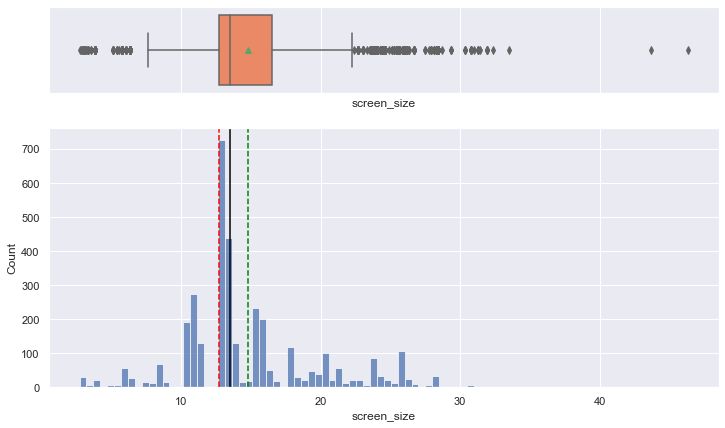

In [230]:
histogram_boxplot(df, 'screen_size')

### Observations
* The distribution of screen_size is positive skewed(right skewed)
* There are outliers in this variable. 
* The observations of screen_size starts from 2.7 to 46.36

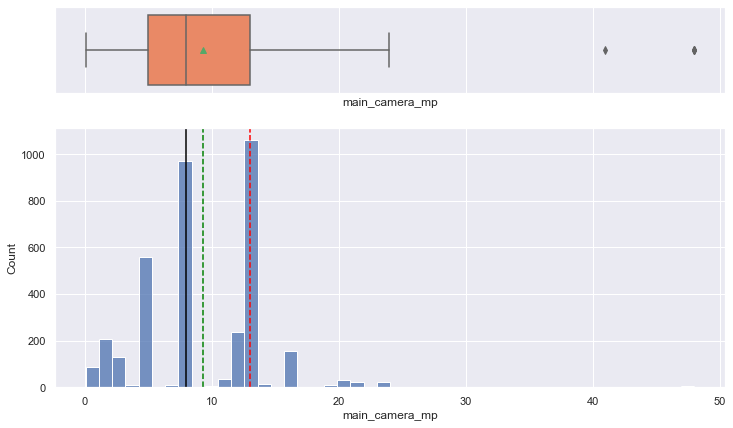

In [231]:
histogram_boxplot(df, 'main_camera_mp')

### Observations
* The distribution of main_camera_mp is positive skewed(right skewed)
* There are outliers in this variable. 
* The median of main_camera_mp is 8.0

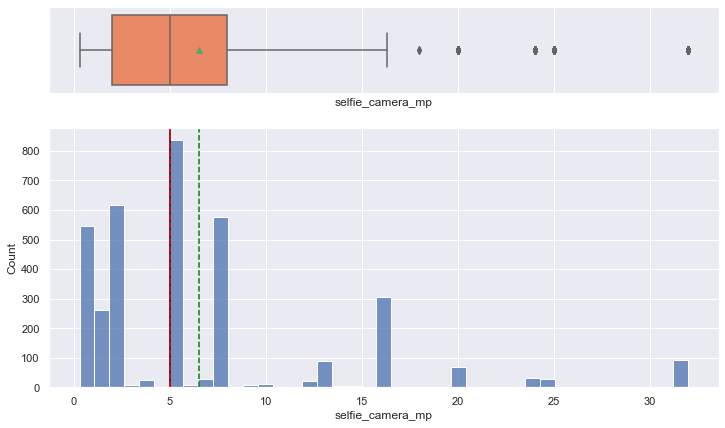

In [232]:
histogram_boxplot(df, 'selfie_camera_mp')

### Observations
* The distribution of selfie_camera_mp is positive skewed(right skewed)
* There are outliers in this variable. 
* The median of selfie_camera_mp is 5.0

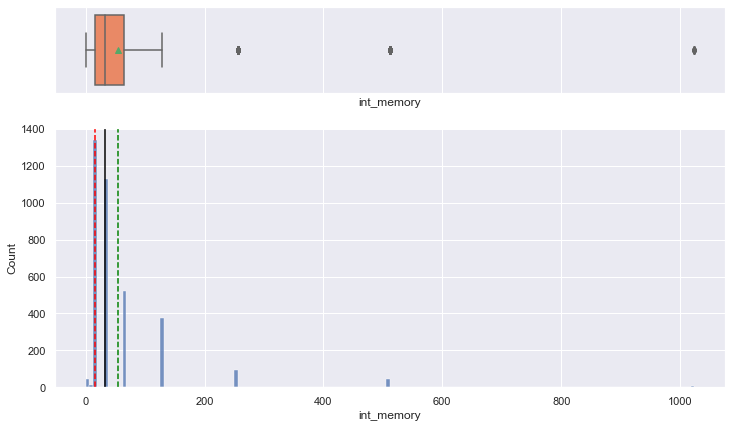

In [233]:
histogram_boxplot(df, 'int_memory')

### Observations
* The distribution of int_memory is positive skewed(right skewed) with outliers
* The median of int_memory is 32.0

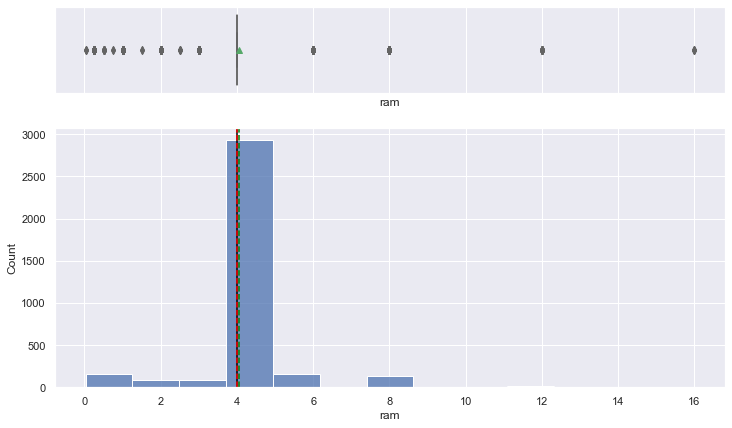

In [234]:
histogram_boxplot(df, 'ram')

### Observations
* The distribution of RAM is positive skewed(right skewed)
* There are outliers in this variable. 
* The mimimum RAM is 0.03 to maximum of 16GB
* All the phones has 4GB of RAM atleast.

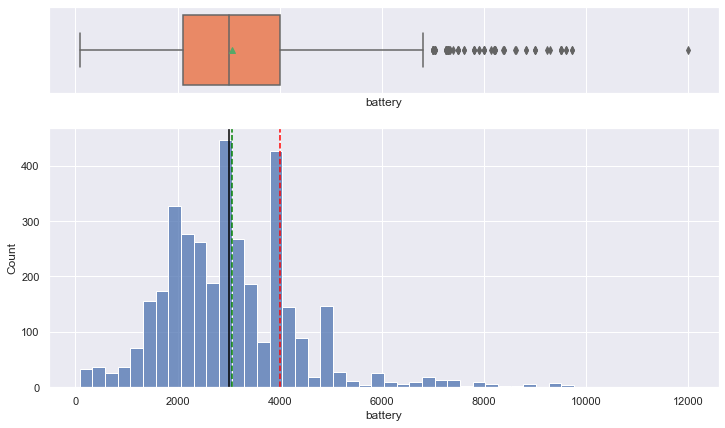

In [235]:
histogram_boxplot(df, 'battery')

### Observations
* The distribution of battery is positive skewed(right skewed)
* There are outliers in this variable. 
* The median of battery is 3000

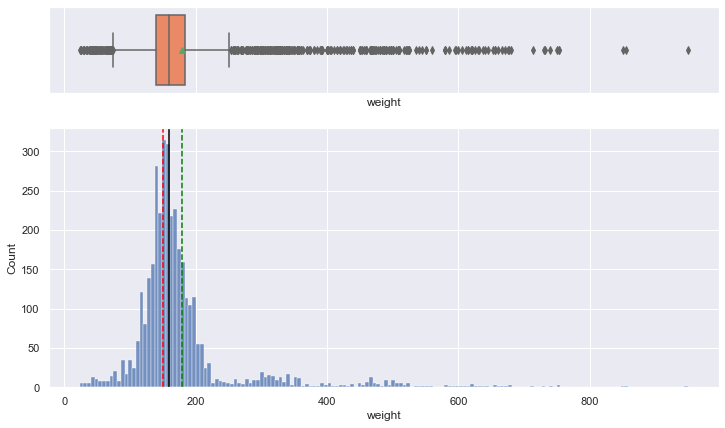

In [236]:
histogram_boxplot(df, 'weight')

### Observations
* The distribution of weight is positive skewed(right skewed)
* There are outliers in this variable. 

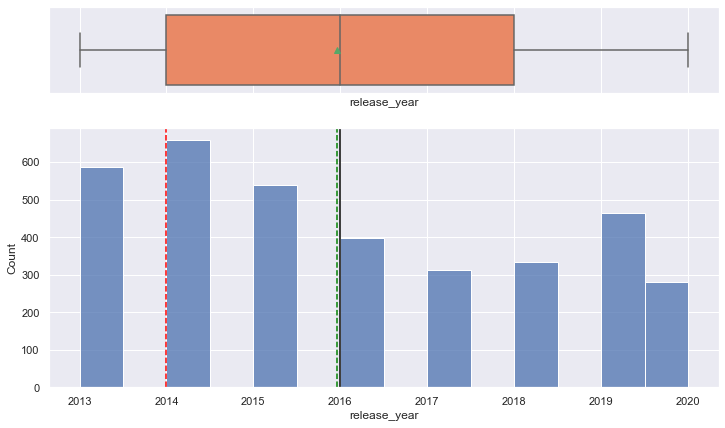

In [237]:
histogram_boxplot(df, 'release_year')

### Observations
* The distribution of release_year is positive skewed(right skewed)
* There are no outliers in this variable. 

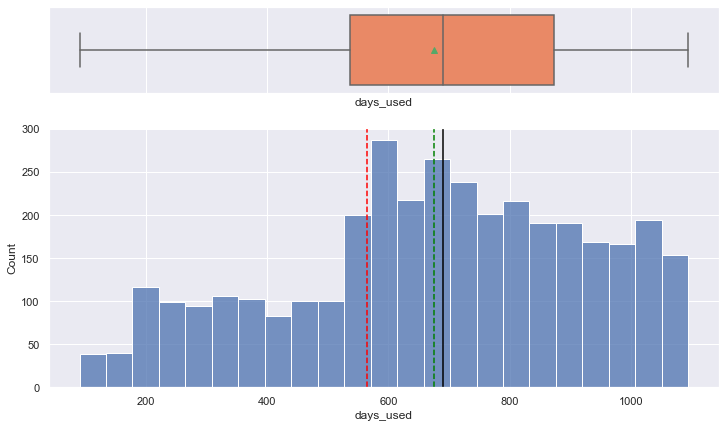

In [238]:
histogram_boxplot(df, 'days_used')

### Observations
* The distribution of days_used is negatively skewed(left skewed)
* There are no outliers in this variable. 

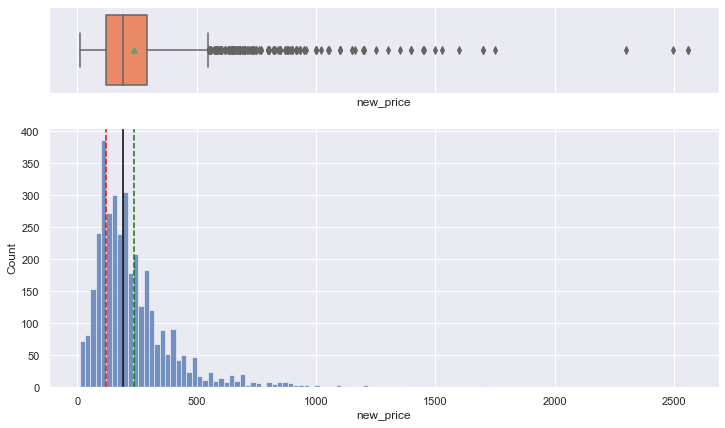

In [239]:
histogram_boxplot(df, 'new_price')

### Observations
* The distribution of new_price is positive skewed(right skewed)
* There are outliers in this variable. 
* The outliers to the right indicate that many phones have a very high new price.

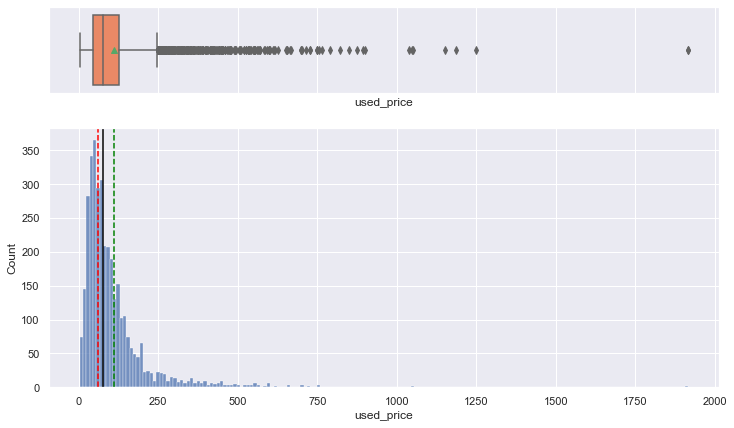

In [240]:
histogram_boxplot(df, 'used_price') #looking at dependent variable

### Observations
* The distribution of used_price is positive skewed(right skewed)
* There are outliers in this variable. 
* The outliers to the right indicate that many used phones have a very high price.

In [241]:
# In this analysis we are taking the categorical column as the input and return barplots for the variable.
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count 
    n: displays the top n category levels 
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 720x504 with 0 Axes>

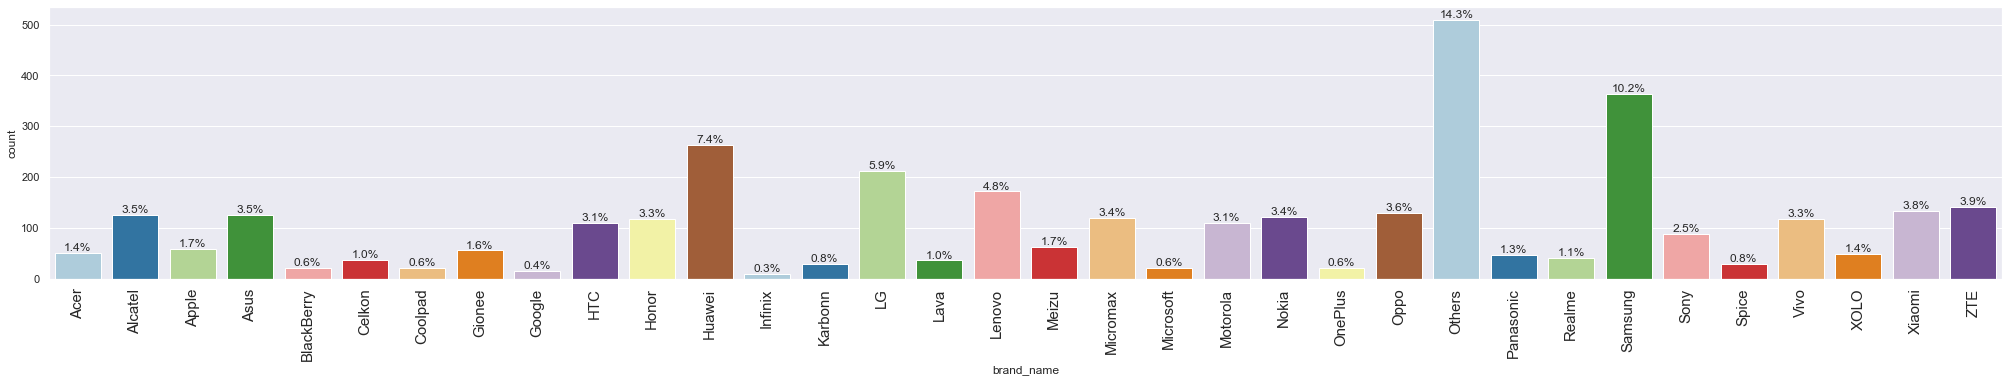

In [242]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'brand_name', perc=True)

### Observations
* The top 3 brands are:
* Others - 14.3%, Samsung - 10.2% and Huawei - 7.4%.

<Figure size 720x504 with 0 Axes>

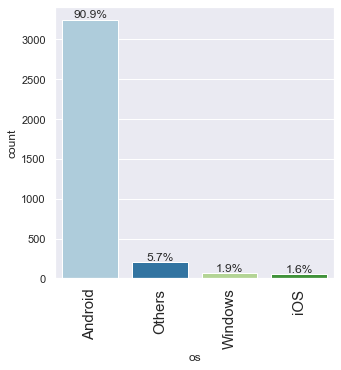

In [243]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'os', perc=True)

### Observations
* Android(OS) with 90.9% is highly preferred os

<Figure size 720x504 with 0 Axes>

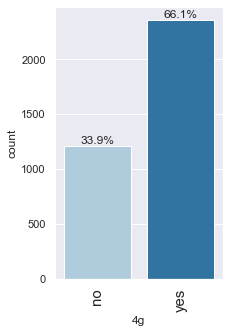

In [244]:
plt.figure(figsize=(10,7))
labeled_barplot(df, '4g', perc=True)

### Observations
* There are 66.1% of 4g mobiles.

<Figure size 720x504 with 0 Axes>

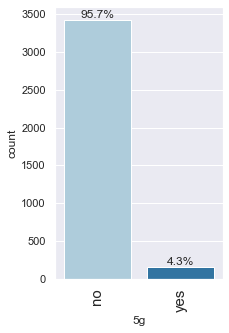

In [245]:
plt.figure(figsize=(10,7))
labeled_barplot(df, '5g', perc=True)

### Observations
* There are 95.7% of 5g mobiles.

## Bivariate Plots

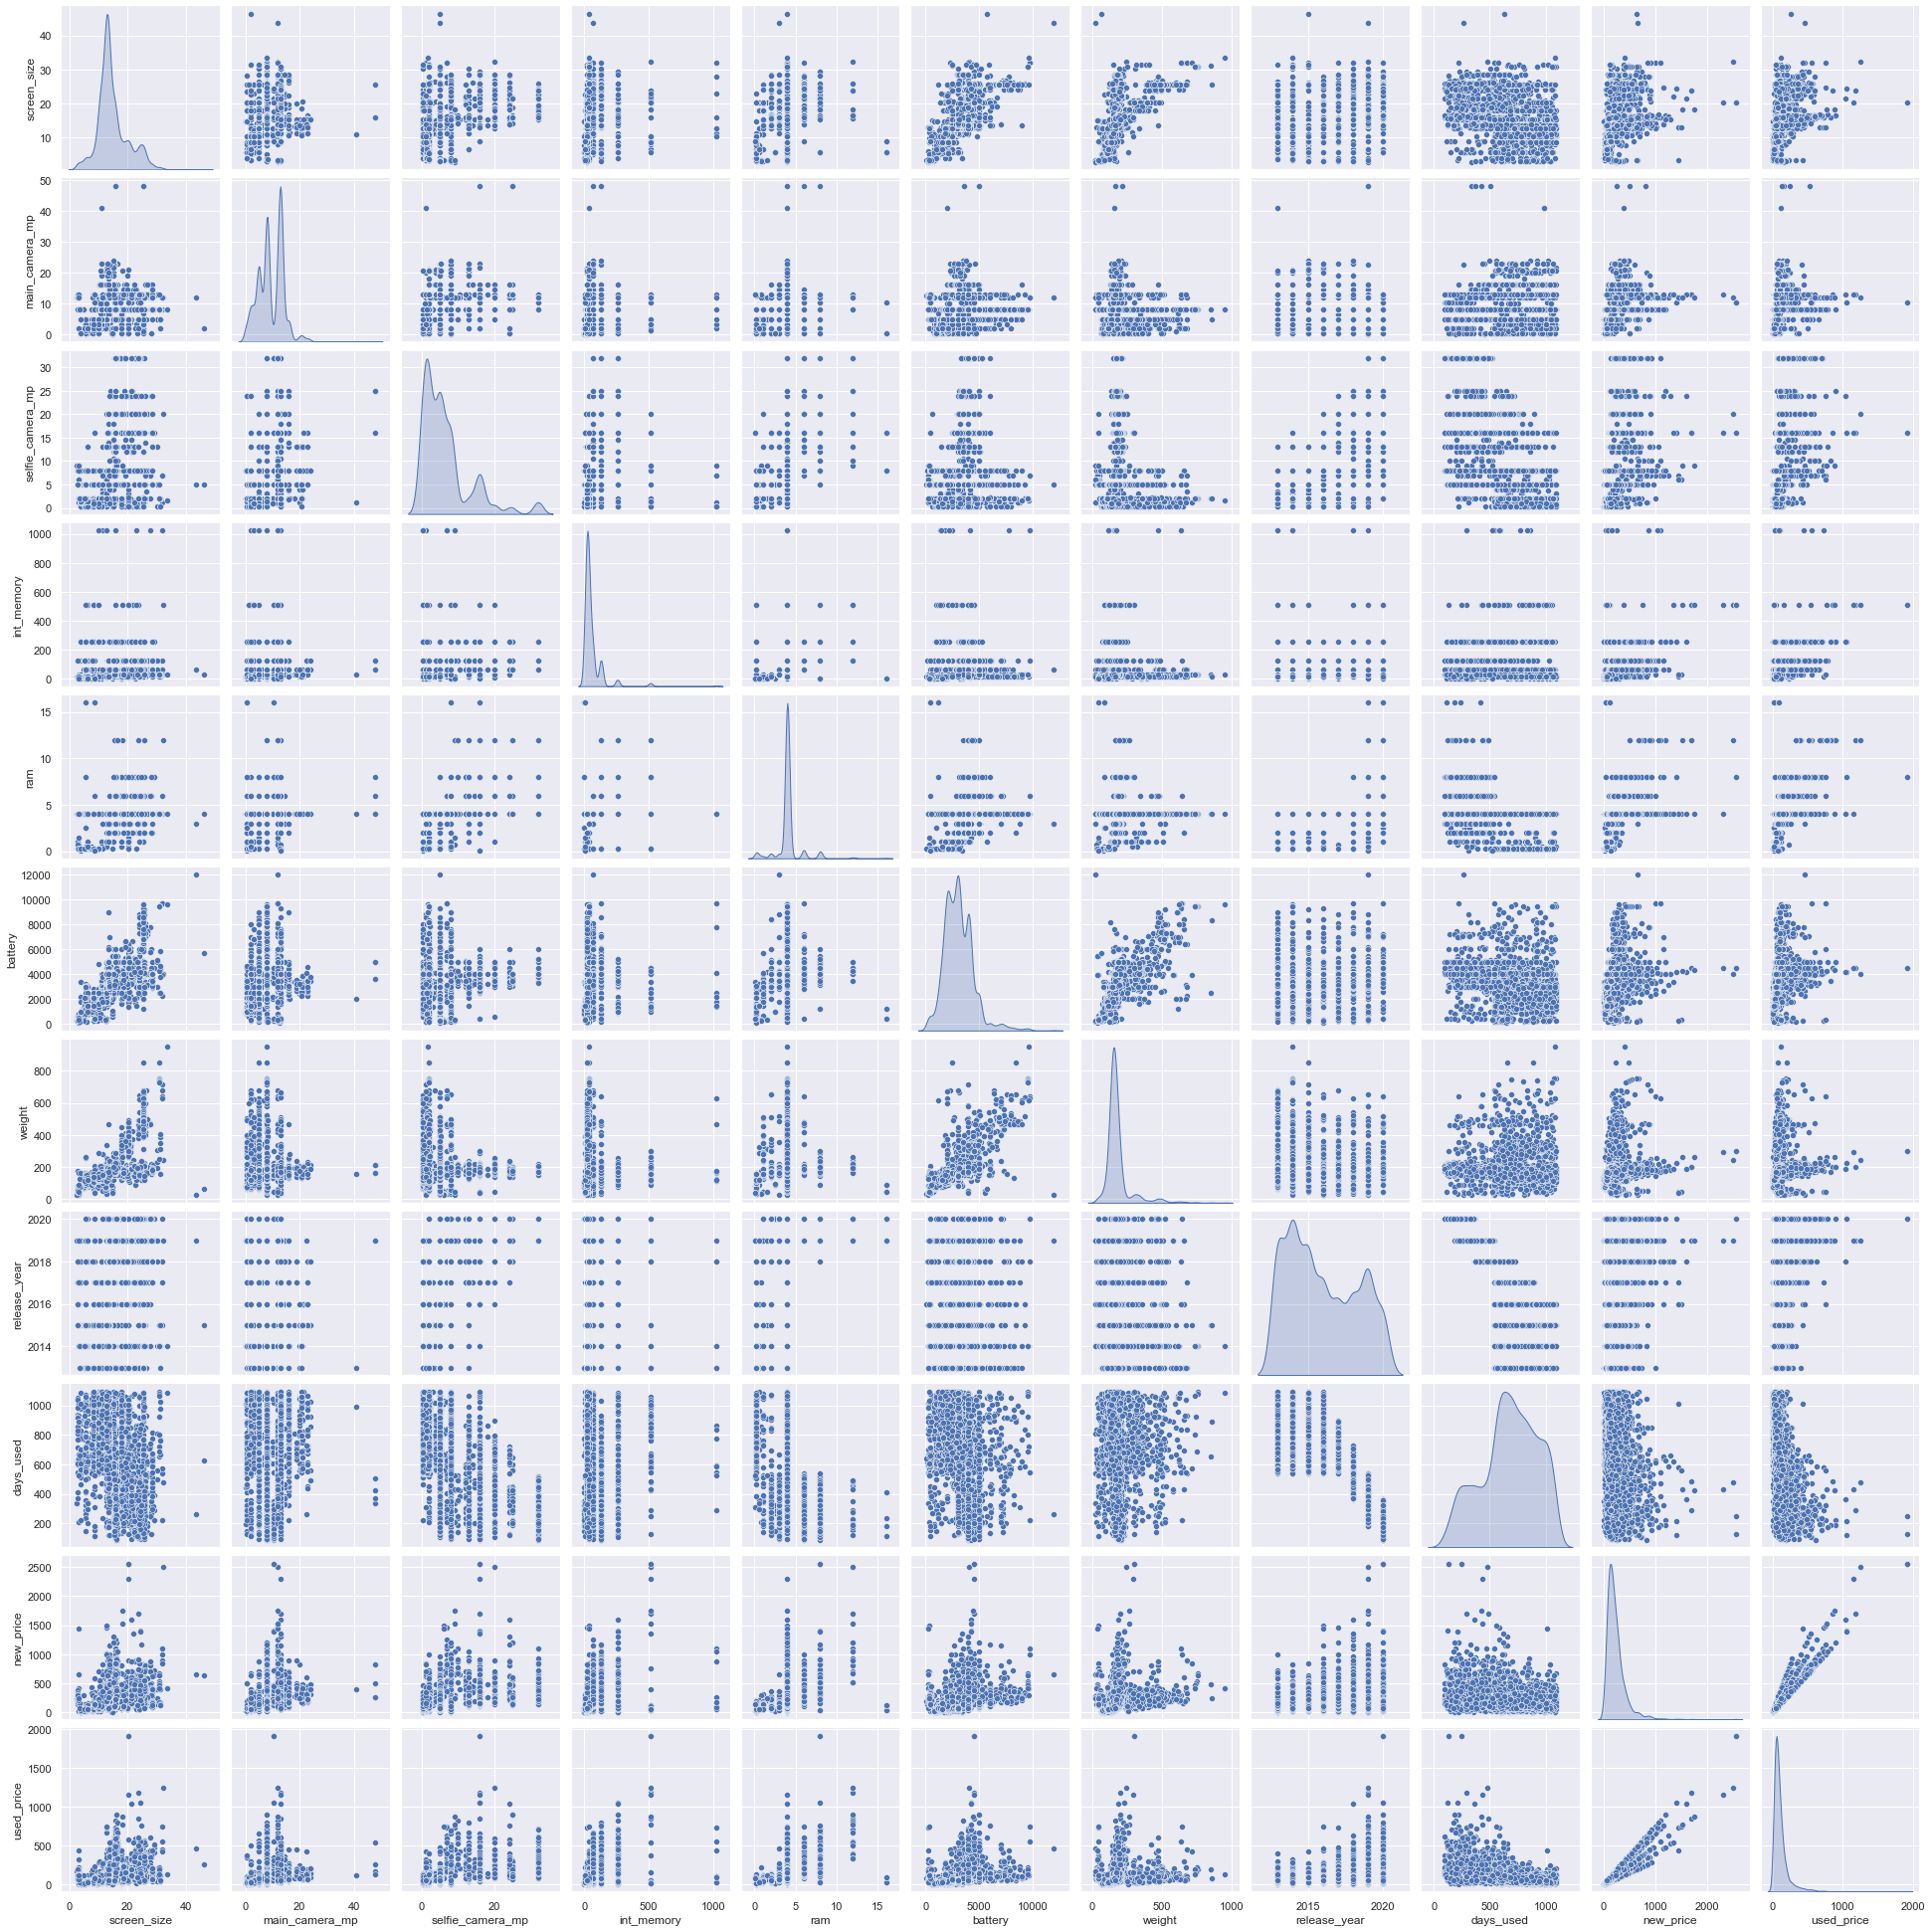

In [246]:
sns.pairplot(df, diag_kind='kde')  

### Observations
* 'used_price' and 'new_price' indicates the relationship is linear whereas other attributes such as selfie_camera_mp, ram, release_year also indicate the relationship is close to linear. 

In [247]:
# correlation of all attributes with life expectancy
df[df.columns[:]].corr()["used_price"][:]

screen_size         0.385928
main_camera_mp      0.243246
selfie_camera_mp    0.496052
int_memory          0.405106
ram                 0.522287
battery             0.363711
weight              0.170846
release_year        0.456764
days_used          -0.470760
new_price           0.926087
used_price          1.000000
Name: used_price, dtype: float64

### Observations
* new_price shows high correlation with used_price of the phone 
* days_used is negatively correlated with used_price
* ram  also has high correlation next to new_price

### used_price vs new_price

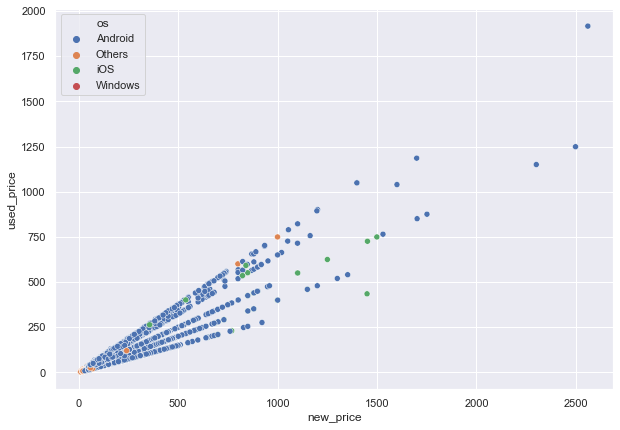

In [248]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="new_price", hue="os", data=df)
plt.show()

### Observations
* Android phones are having high price

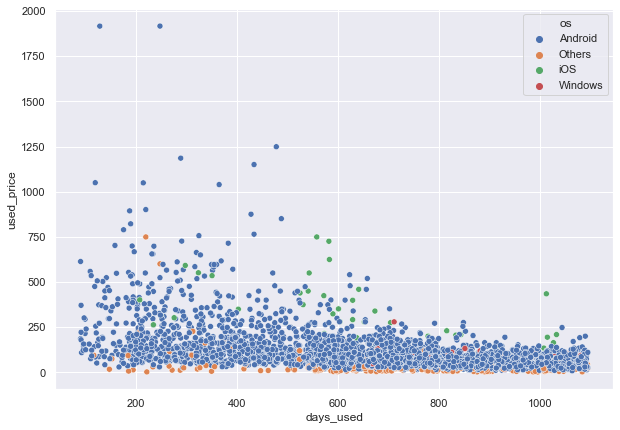

In [249]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="days_used", hue="os", data=df)
plt.show()

### Observations
* used_price of Android phones are high by comparing to the number of days the phone has been used

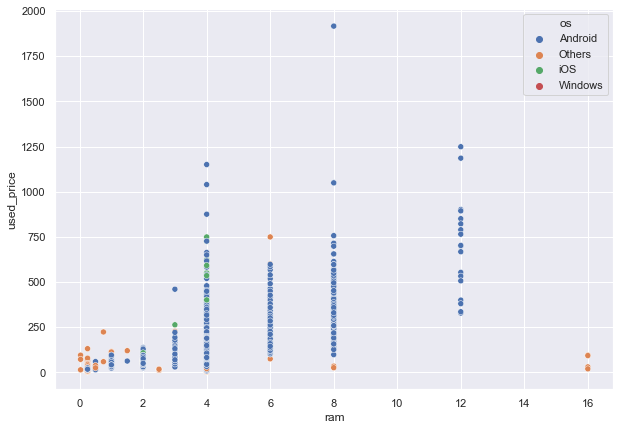

In [250]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="ram", hue="os", data=df)
plt.show()

### Observations
* Android is the most preferred used_phone in the market with RAM 4GB followed by 6GB,8GB and 12GB is highly preferred

### Converting object column to category

In [251]:
df["brand_name"] = df["brand_name"].astype("category")
df["os"] = df["os"].astype("category")
df["4g"] = df["4g"].astype("category")
df["5g"] = df["5g"].astype("category")

### Outlier Detection
Let's look at outliers in every numerical column

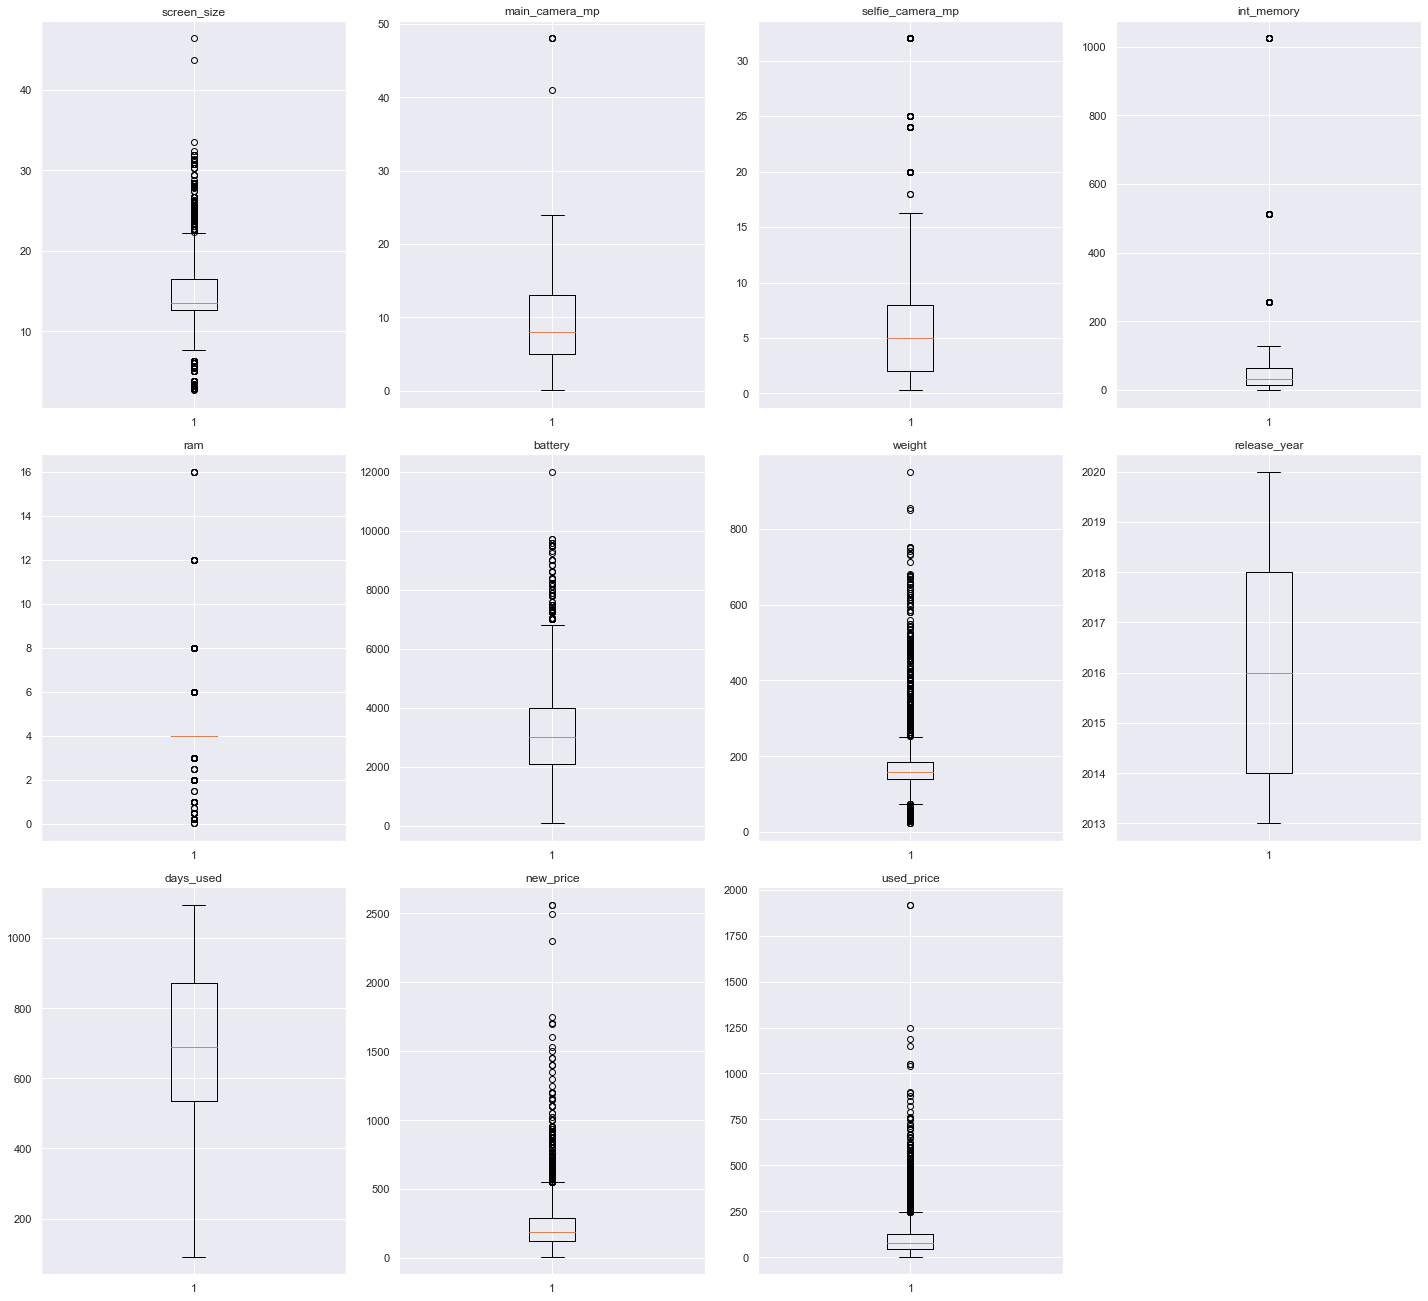

In [252]:
# let's plot the boxplots of all columns to check for outliers
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observations
* There are upper outliers in main_camera_mp, selfie_camera_mp, int_memory, battery, new_price, used_price
* There are no outliers in release_year, days_used
* weight,screen_size,ram has outliers on both the sides
* We will treat these outliers as these might adversely affect the predictive power of linear model. However, in real life, these outliers may be due to non-linear pattern in the data or can be important information.
* Sometimes outliers in the independent variable can adversely impact the linear model. This can be checked by building the model with and without outliers and comparing the model performances.

In [253]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [254]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

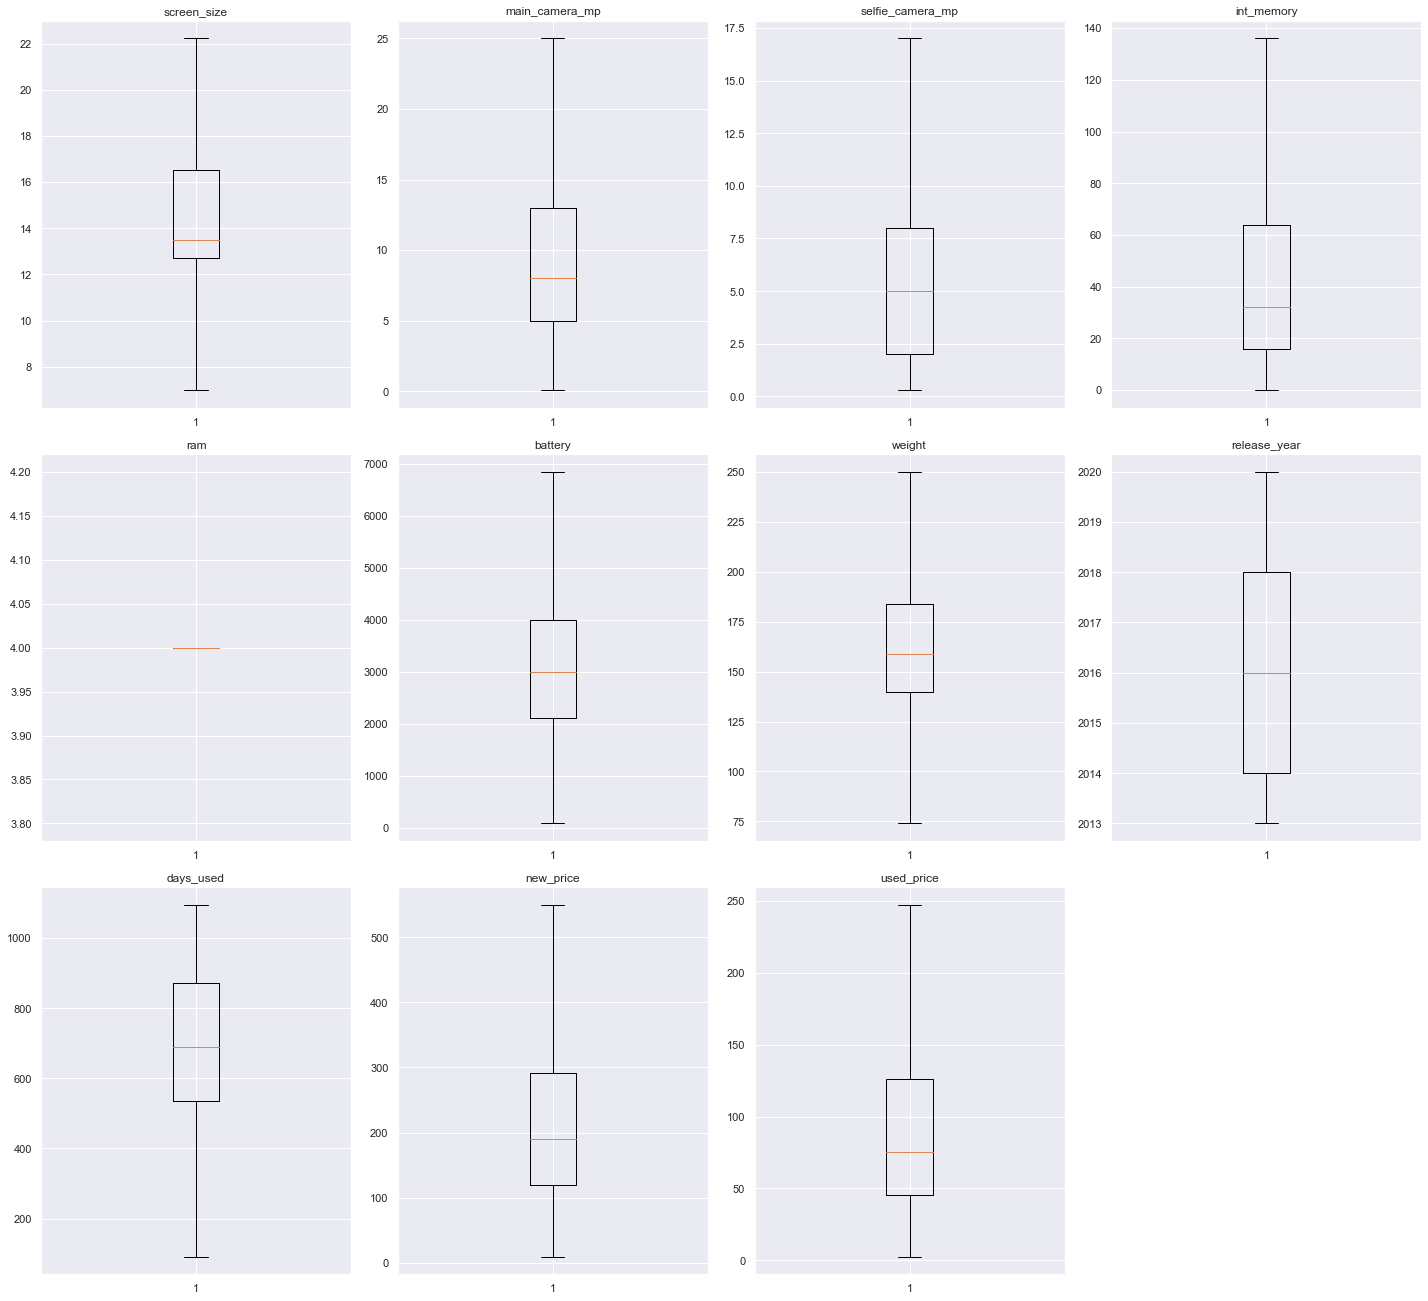

In [255]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Building a Linear Regression model

1. We want to predict the used_price of the phone.
2. Before we proceed to build a model, we'll have to check with categorical features.

In [256]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

In [257]:
df.dtypes

brand_name          category
os                  category
screen_size          float64
4g                  category
5g                  category
main_camera_mp       float64
selfie_camera_mp     float64
int_memory           float64
ram                  float64
battery              float64
weight               float64
release_year           int64
days_used              int64
new_price            float64
used_price           float64
dtype: object

In [258]:
# defining X and y variables
X = df.drop(["used_price"], axis=1)
y = df["used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       22.225  yes   no            13.0   
1      Honor  Android       22.225  yes  yes            13.0   
2      Honor  Android       22.225  yes  yes            13.0   
3      Honor  Android       22.225  yes  yes            13.0   
4      Honor  Android       15.720  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  4.0   3020.0   146.0          2020   
1              16.0       128.0  4.0   4300.0   213.0          2020   
2               8.0       128.0  4.0   4200.0   213.0          2020   
3               8.0        64.0  4.0   6850.0   250.0          2020   
4               8.0        64.0  4.0   5000.0   185.0          2020   

   days_used  new_price  
0        127     111.62  
1        325     249.39  
2        162     359.47  
3        345     278.93  
4        293     140.87  
0     86.9600
1    161.4900
2   

In [261]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,22.225,13.0,5.0,64.0,4.0,3020.0,146.0,2020,127,111.62,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,22.225,13.0,16.0,128.0,4.0,4300.0,213.0,2020,325,249.39,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,22.225,13.0,8.0,128.0,4.0,4200.0,213.0,2020,162,359.47,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,22.225,13.0,8.0,64.0,4.0,6850.0,250.0,2020,345,278.93,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.720,13.0,8.0,64.0,4.0,5000.0,185.0,2020,293,140.87,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [262]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [263]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


In [264]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [265]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,2.076879e-01
main_camera_mp,-2.742636e-01
selfie_camera_mp,8.380688e-01
int_memory,8.588868e-02
ram,1.178065e-10
battery,1.355481e-04
weight,-1.226033e-02
release_year,-2.459011e-01
days_used,-8.460932e-02
new_price,3.844636e-01


In [266]:
#check the performance of the model using different metrics.
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [267]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.960441,10.222224,0.955136,0.954257,18.489055


In [175]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.74532,10.171443,0.957443,0.955446,16.417574


In [176]:
#Linear regression using stats model
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually

# to build linear regression_model using statsmodels
import statsmodels.api as sm
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1110.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:13:22   Log-Likelihood:                -10134.
No. Observations:                2499   AIC:                         2.036e+04
Df Residuals:                    2451   BIC:                         2.064e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
screen_size               0.20

C:\Users\91915\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Observations
* Positive values of the coefficient show that used_price increases with the increase of corresponding attribute value.

### TEST FOR MULTICOLLINEARITY
* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [178]:
checking_vif(x_train1)

,feature,VIF
0,screen_size,3.529005e+00
1,main_camera_mp,2.227816e+00
2,selfie_camera_mp,3.860192e+00
3,int_memory,2.187474e+00
4,ram,3.846732e+06
5,battery,3.730602e+00
6,weight,3.202294e+00
7,release_year,5.000190e+00
8,days_used,2.631834e+00
9,new_price,2.714314e+00


### Removing Multicollinearity

In [179]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [180]:
col_list = [
    "brand_name_Samsung",
    "brand_name_Huawei",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Samsung,0.954293,14.093737
1,brand_name_Huawei,0.954292,14.093960


In [181]:
col_to_drop = "brand_name_Samsung"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Samsung


,feature,VIF
0,screen_size,3.524750e+00
1,main_camera_mp,2.227226e+00
2,selfie_camera_mp,3.860188e+00
3,int_memory,2.187412e+00
4,ram,3.846345e+06
5,battery,3.728465e+00
6,weight,3.200817e+00
7,release_year,4.999172e+00
8,days_used,2.631715e+00
9,new_price,2.702357e+00


* The above predictors have no multicollinearity and the assumption is satisfied.

In [182]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1135.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:13:25   Log-Likelihood:                -10134.
No. Observations:                2499   AIC:                         2.036e+04
Df Residuals:                    2452   BIC:                         2.064e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
screen_size               0.20

In [183]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'days_used', 'new_price', 'brand_name_Apple', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_Infinix', 'brand_name_Nokia', 'brand_name_OnePlus', 'os_Others', '4g_yes']


In [184]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [185]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4016.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:13:25   Log-Likelihood:                -10150.
No. Observations:                2499   AIC:                         2.033e+04
Df Residuals:                    2485   BIC:                         2.041e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
main_camera_mp        -0.2818      0

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [186]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
844,100.48,99.945686,0.534314
1539,111.68,117.259896,-5.579896
3452,113.89,112.268446,1.621554
1727,64.09,70.591034,-6.501034
1926,67.95,68.430949,-0.480949


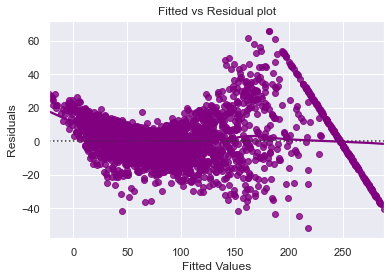

In [187]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

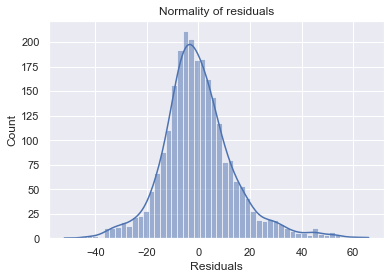

In [188]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

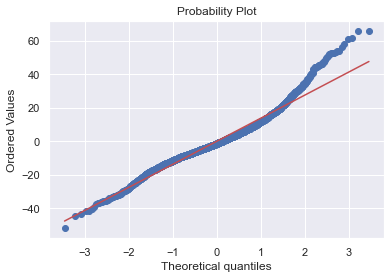

In [189]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [190]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9610336422920227, pvalue=2.135094194735291e-25)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Hence, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [286]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.048777362961077), ('p-value', 0.20135126405844322)]

In [192]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2098,30.5200,23.079415
278,195.6700,188.682824
26,247.1925,224.762738
2910,89.9700,91.279577
2631,69.2000,63.993617
1582,89.5800,108.524466
2110,247.1925,263.744572
3160,65.3400,65.515000
2817,115.7700,106.128341
549,39.2900,48.311867


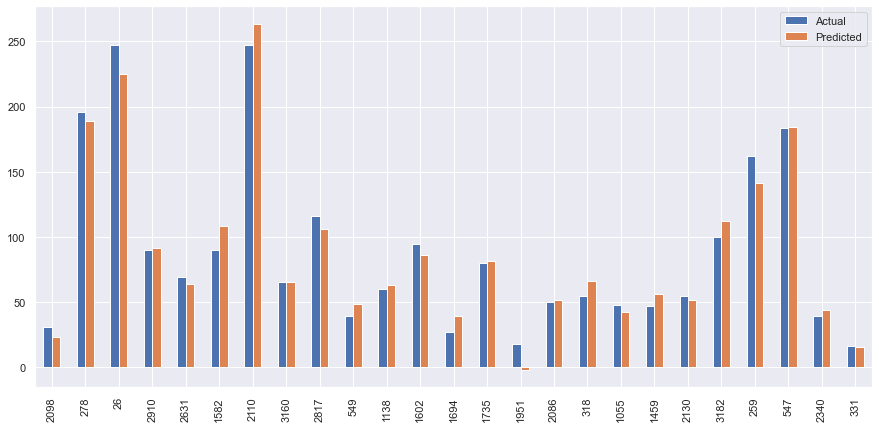

In [193]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [194]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.04901,10.278116,0.954564,0.954308,18.665149


In [195]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.722107,10.109717,0.957586,0.957025,16.300215


In [196]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.960441,14.049010
MAE,10.222224,10.278116
R-squared,0.955136,0.954564
Adj. R-squared,0.954257,0.954308
MAPE,18.489055,18.665149


In [197]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.745320,13.722107
MAE,10.171443,10.109717
R-squared,0.957443,0.957586
Adj. R-squared,0.955446,0.957025
MAPE,16.417574,16.300215


In [198]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4016.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        01:13:30   Log-Likelihood:                -10150.
No. Observations:                2499   AIC:                         2.033e+04
Df Residuals:                    2485   BIC:                         2.041e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
main_camera_mp        -0.2818      0

## Final Model Summary

## Conclusions

1. days_used is very significant, as expected. As it increases, the used_price decreases, as is visible in the negative coefficient sign.


2. Android phones with more than 4GB RAM is highly preffered by the customers 


3. Used price of the phone and new price has high correlation


4. days_used,release_year, selfie_camera_mp, ram have positive coefficients. So, as they increase, used_price of the phone also increases.

5. Huawei has wide range of RAM configuration among others phones.

## Actionable Insights and Recommendations
* One of the most important considerations when buying a refurbished phone is the no of days the phone has been used , here to attract more customers we can offer the used phones at a very good price which is budget friendly by selling it in offers.
* If the model of the phone has been released in the recent years then there comes a relationship with new price of the model.
* we can still consider to sell the phones at good price by checking the ram of the phones and by that we can decide the price